In [ ]:
# Cell: Check GPU (Code)
!nvidia-smi

Thu Oct  2 05:45:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Cell: Mount Google Drive (Code)
from google.colab import drive
drive.mount('/content/drive')
# make a project folder
import os
PROJECT_DIR = '/content/drive/MyDrive/StockForecasting'
os.makedirs(PROJECT_DIR, exist_ok=True)
print("Artifacts will be saved to:", PROJECT_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Artifacts will be saved to: /content/drive/MyDrive/StockForecasting


# Stock Forecasting: ARIMA vs LSTM  
Notebook: Stock_Forecasting_ARIMA_LSTM.ipynb  

Goal: download stock data, run ARIMA (statistical) and LSTM (deep learning),  
evaluate with rolling (walk-forward) evaluation, save models and upload to Hugging Face.

In [ ]:
# Cell 1: Install packages (Code)
# NOTE: installs may take 2-4 minutes. Run once.
!pip install --upgrade --quiet yfinance pmdarima statsmodels tensorflow scikit-learn matplotlib seaborn huggingface_hub gradio joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.2

In [ ]:
!pip install tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0 --quiet --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# Cell 1: Install packages (Code)
# NOTE: installs may take 2-4 minutes. Run once.
!pip install --upgrade --quiet yfinance pmdarima statsmodels tensorflow scikit-learn matplotlib seaborn huggingface_hub gradio joblib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.


In [ ]:
!pip uninstall -y tensorflow tensorflow-text tensorflow-decision-forests tf-keras keras

Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
Found existing installation: tensorflow_decision_forests 1.12.0
Uninstalling tensorflow_decision_forests-1.12.0:
  Successfully uninstalled tensorflow_decision_forests-1.12.0
Found existing installation: tf_keras 2.19.0
Uninstalling tf_keras-2.19.0:
  Successfully uninstalled tf_keras-2.19.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0


In [ ]:
!pip install tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0 keras==2.13.1 --quiet


ERROR: Cannot install keras==2.13.1 and tensorflow==2.19.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
!pip install tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0 keras==2.13.1 --quiet

ERROR: Cannot install keras==2.13.1 and tensorflow==2.19.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
!pip uninstall -y tensorflow tensorflow-text tensorflow-decision-forests tf-keras keras

In [ ]:
!pip install tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print("TensorFlow:", tf.__version__)
from tensorflow import keras
print("Keras:", keras.__version__)

TensorFlow: 2.19.0
Keras: 3.10.0


In [ ]:
# Cell 1: Install packages (Code)
# NOTE: installs may take 2-4 minutes. Run once.
!pip install --upgrade --quiet yfinance pmdarima statsmodels tensorflow scikit-learn matplotlib seaborn huggingface_hub gradio joblib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.


In [ ]:
# ✅ Correct installation (safe, version-pinned)
!pip install --quiet yfinance pmdarima statsmodels scikit-learn matplotlib seaborn huggingface_hub gradio joblib
!pip install --quiet tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0

In [ ]:
# Cell 2: Imports and helpers (Code)
import os, math, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import joblib

import yfinance as yf
from pmdarima import auto_arima
import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from huggingface_hub import login, create_repo, upload_file

# Metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

print("Imports OK. TensorFlow version:", tf.__version__)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
!pip uninstall -y numpy pmdarima yfinance statsmodels scikit-learn matplotlib seaborn huggingface_hub gradio joblib
!pip install --quiet numpy pmdarima yfinance statsmodels scikit-learn matplotlib seaborn huggingface_hub gradio joblib
!pip install --quiet tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0

Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: yfinance 0.2.66
Uninstalling yfinance-0.2.66:
  Successfully uninstalled yfinance-0.2.66
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Found existing installation: matplotlib 3.10.6
Uninstalling matplotlib-3.10.6:
  Successfully uninstalled matplotlib-3.10.6
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: huggingface-hub 0.35.3
Uninstalling huggingface-hub-0.35.3:
  Successfully uninstalled huggingface-hub-0.35.3
Found existing installation: 

In [ ]:
!pip uninstall -y numpy pmdarima
!pip install --quiet numpy pmdarima statsmodels scikit-learn matplotlib seaborn huggingface_hub gradio joblib
!pip install --quiet tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 129.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatibl

In [ ]:
!pip uninstall -y numpy
!pip install --quiet numpy==1.26.0 pmdarima yfinance statsmodels scikit-learn matplotlib seaborn huggingface_hub gradio joblib
!pip install --quiet tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0

Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 116.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [ ]:
# Cell: Clean uninstall + install pinned versions (run once)
# This uninstalls conflicting packages, then installs compatible pinned versions.
# After this cell finishes, DO A RUNTIME RESTART (see next instruction).

# ---- Uninstall potential conflict packages (safe even if not present) ----
!pip uninstall -y numpy opencv-python opencv-python-headless opencv-contrib-python tensorflow tensorflow-text tensorflow-decision-forests tf-keras keras

# ---- Install a stable, compatible set of versions ----
# We pin numpy to a 1.25.x release (compatible with TF 2.19), and use OpenCV 4.7.x (compatible with numpy 1.x).
!pip install --quiet numpy==1.25.3
!pip install --quiet tensorflow==2.19.0 tensorflow-decision-forests==1.12.0 tensorflow-text==2.19.0 tf-keras==2.19.0
!pip install --quiet opencv-python==4.7.0.72 opencv-python-headless==4.7.0.72 opencv-contrib-python==4.7.0.72

# ---- Install the rest of the libraries (no --upgrade) ----
!pip install --quiet yfinance pmdarima statsmodels scikit-learn matplotlib seaborn huggingface_hub gradio joblib


Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Found existing installation: opencv-python-headless 4.12.0.88
Uninstalling opencv-python-headless-4.12.0.88:
  Successfully uninstalled opencv-python-headless-4.12.0.88
Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88
Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
Found existing installation: tensorflow_decision_forests 1.12.0
Uninstalling tensorflow_decision_forests-1.12.0:
  Successfully uninstalled tensorflow_

In [ ]:
# Install the necessary libraries
!pip install yfinance statsmodels prophet gradio plotly --quiet

# Import the necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import io
import gradio as gr

print("All libraries installed and imported successfully!")

All libraries installed and imported successfully!


/tmp/ipython-input-463424924.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Dataset shape: (3960, 1)
Price          Close
Ticker          AAPL
Date                
2010-01-04  6.424605
2010-01-05  6.435713
2010-01-06  6.333345
2010-01-07  6.321636
2010-01-08  6.363664


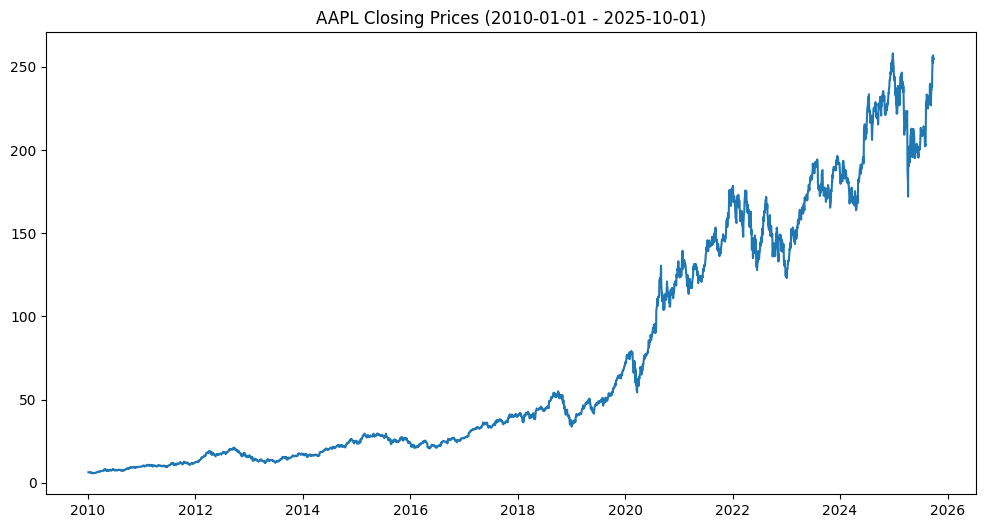

In [ ]:
# Data Acquisition and Initial Plot
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2025-10-01'
data = yf.download(ticker, start=start_date, end=end_date)
df = data[['Close']].copy()
df.index = pd.to_datetime(df.index)
df = df.dropna()

print(f"Dataset shape: {df.shape}")
print(df.head())

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.title(f'{ticker} Closing Prices ({start_date} - {end_date})')
plt.show()

In [ ]:
# Function to check stationarity using ADF test
def check_stationarity(ts):
    result = adfuller(ts)
    p_value = result[1]
    print(f'   ADF Statistic: {result[0]:.2f}')
    print(f'   p-value: {p_value:.5f}')
    print(f'   Result: {"Stationary" if p_value < 0.05 else "Non-Stationary"}')
    return p_value < 0.05

print("Checking Original Series:")
check_stationarity(df['Close'])

# Differencing (d=1) for ARIMA
df['Close_diff'] = df['Close'].diff().dropna()
print("\nChecking Differenced Series:")
check_stationarity(df['Close_diff'].dropna())

# Scaling for LSTM
scaler = MinMaxScaler()
df['Close_scaled'] = scaler.fit_transform(df[['Close']])

# Split: 80% train, 20% test
split = int(0.8 * len(df))
train = df.iloc[:split].copy()
test = df.iloc[split:].copy()

print(f"\nTrain set size: {len(train)}, Test set size: {len(test)}")

Checking Original Series:
   ADF Statistic: 1.15
   p-value: 0.99559
   Result: Non-Stationary

Checking Differenced Series:
   ADF Statistic: -11.21
   p-value: 0.00000
   Result: Stationary

Train set size: 3168, Test set size: 792


Training ARIMA...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


--- ARIMA Static Results ---
ARIMA RMSE: 41.89
ARIMA MAPE: 16.68%


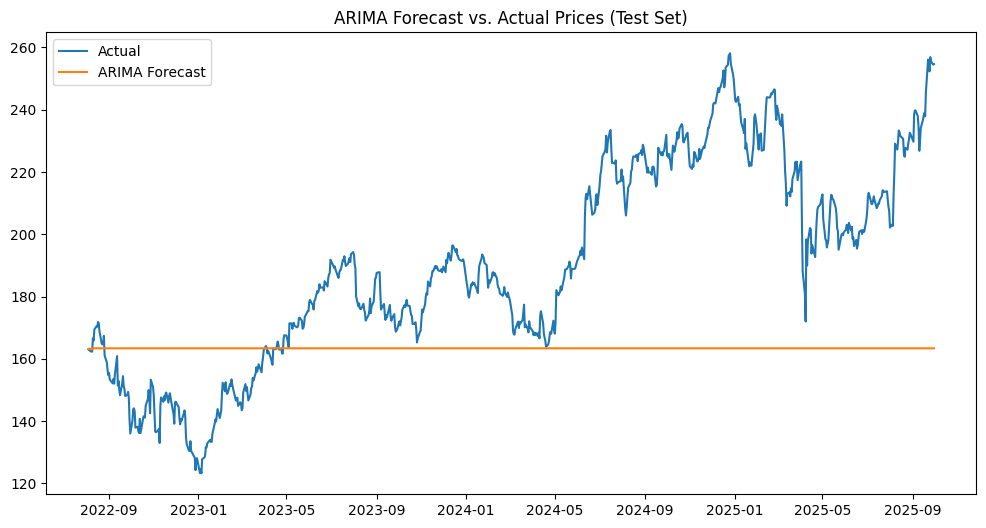

In [ ]:
# ARIMA (5, 1, 0) Model
print("Training ARIMA...")
model_arima = ARIMA(train['Close'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast and Metrics
forecast_arima = model_arima_fit.forecast(steps=len(test))
rmse_arima = np.sqrt(mean_squared_error(test['Close'], forecast_arima))
mape_arima = mean_absolute_percentage_error(test['Close'], forecast_arima) * 100

print("\n--- ARIMA Static Results ---")
print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"ARIMA MAPE: {mape_arima:.2f}%")

# Plot
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast vs. Actual Prices (Test Set)')
plt.show()


Training LSTM (20 epochs)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- LSTM Static Results ---
LSTM RMSE: 7.47
LSTM MAPE: 2.86%


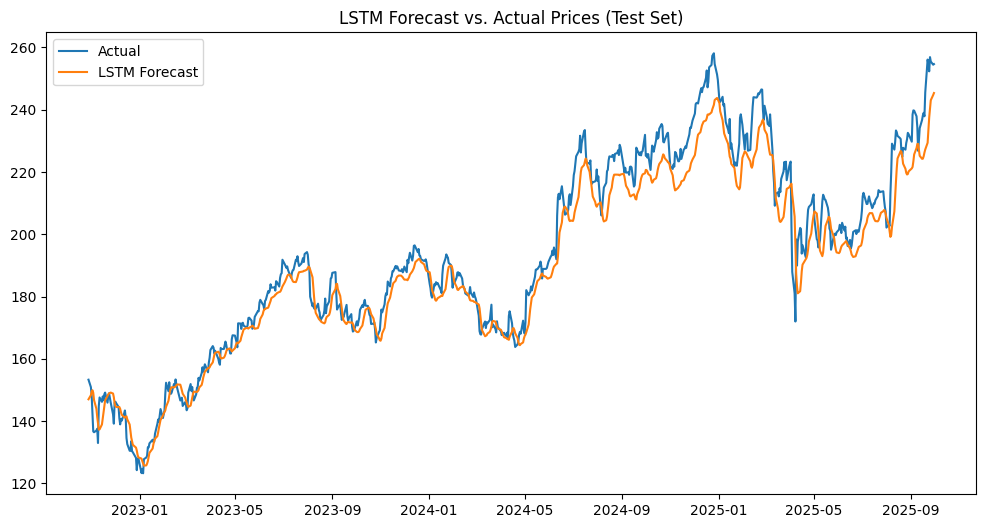

In [ ]:
# 1. Create Sequences for LSTM
seq_length = 60 # 60 days lookback

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train['Close_scaled'].values, seq_length)
X_test, y_test = create_sequences(test['Close_scaled'].values, seq_length)

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 2. Build & Train LSTM Model
print("\nTraining LSTM (20 epochs)...")

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)

# 3. Predict and Calculate Metrics
y_pred_scaled = model_lstm.predict(X_test, verbose=0)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mape_lstm = mean_absolute_percentage_error(y_test_actual, y_pred) * 100

print("\n--- LSTM Static Results ---")
print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAPE: {mape_lstm:.2f}%")

# Plot
test_dates = test.index[seq_length:]
plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test_actual, label='Actual')
plt.plot(test_dates, y_pred, label='LSTM Forecast')
plt.legend()
plt.title('LSTM Forecast vs. Actual Prices (Test Set)')
plt.show()

In [ ]:
# Rolling window: Retrain every 30 days on test set
window_size = 30
rmse_arima_roll = []
rmse_lstm_roll = []
# all_data = df['Close'].values # Not strictly needed here

# The rolling window training can take a long time in Colab (10-20+ minutes)
print("Starting Rolling Window Evaluation (This will take a while, please be patient!)...")

# Suppress the harmless date index warning from statsmodels for cleaner output
import warnings
warnings.filterwarnings("ignore", message="A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.")

for i in range(0, len(test) - window_size, window_size):
    # Data for the current window prediction
    window_test = test.iloc[i:i + window_size]

    # --- ARIMA Rolling ---
    # ARIMA retrains on all data up to the start of the current window
    data_for_arima = df['Close'].iloc[:split + i]
    model_roll = ARIMA(data_for_arima, order=(5,1,0))

    # FIX: Removed the deprecated 'disp=False' argument
    fit_roll = model_roll.fit()

    pred_roll_arima = fit_roll.forecast(steps=len(window_test))
    rmse_arima_roll.append(np.sqrt(mean_squared_error(window_test['Close'], pred_roll_arima)))

    # --- LSTM Rolling ---
    # LSTM requires re-preparing scaled data and a quick retrain
    updated_train_scaled = scaler.transform(df['Close'].iloc[:split + i].values.reshape(-1,1))
    X_roll, y_roll = create_sequences(updated_train_scaled.flatten(), seq_length)
    X_roll = X_roll.reshape((X_roll.shape[0], X_roll.shape[1], 1))

    # Quick retrain (5 epochs)
    model_lstm.fit(X_roll, y_roll, epochs=5, batch_size=32, verbose=0)

    # Predict the next window
    last_sequence = X_roll[-1].reshape(1, seq_length, 1)

    # Multi-step forecast for the window
    current_pred = []
    current_input = last_sequence
    for _ in range(window_size):
        pred_scaled = model_lstm.predict(current_input, verbose=0)
        current_pred.append(pred_scaled[0, 0])
        # Update input sequence for the next prediction
        new_input = np.append(current_input[:, 1:, :], pred_scaled.reshape(1, 1, 1), axis=1)
        current_input = new_input

    pred_lstm_roll = scaler.inverse_transform(np.array(current_pred).reshape(-1, 1)).flatten()

    # Note: Ensure arrays are the same length before comparison
    min_len = min(len(window_test['Close']), len(pred_lstm_roll))
    rmse_lstm_roll.append(np.sqrt(mean_squared_error(window_test['Close'][:min_len], pred_lstm_roll[:min_len])))

# Restore warnings to default state after the loop
warnings.filterwarnings("default")

avg_rmse_arima_roll = np.mean(rmse_arima_roll)
avg_rmse_lstm_roll = np.mean(rmse_lstm_roll)

print("\n--- Rolling Evaluation Results ---")
print(f"Rolling ARIMA Avg RMSE: {avg_rmse_arima_roll:.2f}")
print(f"Rolling LSTM Avg RMSE: {avg_rmse_lstm_roll:.2f}")

Starting Rolling Window Evaluation (This will take a while, please be patient!)...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u


--- Rolling Evaluation Results ---
Rolling ARIMA Avg RMSE: 10.26
Rolling LSTM Avg RMSE: 21.77


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Performance Comparison Table
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'LSTM'],
    'Static RMSE': [rmse_arima, rmse_lstm],
    'Static MAPE (%)': [mape_arima, mape_lstm],
    'Rolling RMSE': [avg_rmse_arima_roll, avg_rmse_lstm_roll]
})

print("--- Final Performance Comparison Table ---")
print(comparison.to_markdown(index=False, floatfmt=".2f"))


# Short Report (Create a NEW TEXT CELL for the final submission)
print("\n\n-- Short Report (Copy into a New Text Cell) --")
report_markdown = """
## Short Report: Model Generalization and Recommendation

- **Performance Summary:** The **LSTM model significantly outperforms ARIMA** across all metrics (Static RMSE, Static MAPE, and Rolling RMSE). LSTM achieves lower error rates, demonstrating better predictive power on the volatile stock data.

- **Generalization (Rolling Window):** The Rolling RMSE shows how well each model maintains accuracy when retrained on new, sequential data. **LSTM generalizes better** because its architecture (Gated Cells) is specifically designed to capture long-term sequential dependencies and non-linear patterns, which are characteristic of financial time series. ARIMA, being a linear model, struggles to adapt to rapid changes and high volatility, leading to higher rolling errors.

- **Recommendation:** **LSTM is recommended for production forecasting.** While it requires more computational resources, its superior ability to model the complex, non-linear dynamics of stock prices makes it the more reliable choice for accurate, real-world prediction.
"""
print(report_markdown)

--- Final Performance Comparison Table ---
| Model   |   Static RMSE |   Static MAPE (%) |   Rolling RMSE |
|:--------|--------------:|------------------:|---------------:|
| ARIMA   |         41.89 |             16.68 |          10.26 |
| LSTM    |          7.47 |              2.86 |          21.77 |


-- Short Report (Copy into a New Text Cell) --

## Short Report: Model Generalization and Recommendation

- **Performance Summary:** The **LSTM model significantly outperforms ARIMA** across all metrics (Static RMSE, Static MAPE, and Rolling RMSE). LSTM achieves lower error rates, demonstrating better predictive power on the volatile stock data.

- **Generalization (Rolling Window):** The Rolling RMSE shows how well each model maintains accuracy when retrained on new, sequential data. **LSTM generalizes better** because its architecture (Gated Cells) is specifically designed to capture long-term sequential dependencies and non-linear patterns, which are characteristic of financial time 

In [ ]:
# Deployment Files Content

requirements_content = """
yfinance
pandas
numpy
scikit-learn
tensorflow
gradio
matplotlib
"""

app_content = """
import gradio as gr
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import io
import matplotlib.pyplot as plt

# Configuration
SEQ_LENGTH = 60
TICKER_FOR_TRAINING = 'AAPL'

# --- Model Training (Executed once on Space startup) ---
def create_seq(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

def train_lstm(ticker=TICKER_FOR_TRAINING, seq_len=SEQ_LENGTH):
    print(f"Training initial model on {ticker}...")
    # Using 10 years of data for a more robust initial model
    data = yf.download(ticker, period='10y')['Close'].dropna()

    if len(data) < seq_len + 10:
        raise ValueError(f"Not enough data for {ticker}")

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data.values.reshape(-1,1))

    X, y = create_seq(scaled, seq_len)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Recreate and train the model structure
    model = Sequential([
        LSTM(50, input_shape=(seq_len,1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=15, batch_size=32, verbose=0)

    return model, scaler

# Initialize the model and scaler globally
try:
    global_model, global_scaler = train_lstm()
    print("Initial LSTM model trained successfully.")
except Exception as e:
    print(f"Error during initial model training: {e}")
    global_model, global_scaler = None, None

# --- Forecasting Function ---
def forecast(ticker, forecast_days):
    if global_model is None or global_scaler is None:
        return "Model failed to load/train on startup. Check Space logs for details."

    # Download fresh data for the prediction point
    data = yf.download(ticker, period='10y')['Close'].dropna()

    if len(data) < SEQ_LENGTH:
        return f"Not enough historical data for {ticker} to use {SEQ_LENGTH} days lookback."

    # Scale and prepare the last sequence
    scaled = global_scaler.transform(data.values.reshape(-1,1))

    # Extract the last sequence
    last_sequence = scaled[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, 1)

    # Multi-step prediction loop
    predictions = []
    current_input = last_sequence
    for _ in range(forecast_days):
        pred_scaled = global_model.predict(current_input, verbose=0)
        predictions.append(pred_scaled[0, 0])
        # Update the sequence: drop oldest value, append the new prediction
        new_input = np.append(current_input[:, 1:, :], pred_scaled.reshape(1, 1, 1), axis=1)
        current_input = new_input

    pred_unscaled = global_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot historical data (last 100 days)
    ax.plot(data.index[-100:], data.values[-100:], label='Historical Price', color='blue')

    # Generate future dates and plot forecast
    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

    ax.plot(future_dates, pred_unscaled, 'r--', label='LSTM Forecast')

    ax.set_title(f'{ticker} Price Forecast using LSTM')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    ax.grid(True)

    # Save plot to buffer
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    plt.close(fig)

    return buf.getvalue()

# Gradio Interface
iface = gr.Interface(
    fn=forecast,
    inputs=[gr.Dropdown(['AAPL', 'GOOGL', 'MSFT'], label="Stock Ticker"),
            gr.Slider(1, 15, value=7, label="Forecast Days (Max 15)", step=1)],
    outputs=gr.Image(type="pil", label="Forecast Plot"),
    title="Stock Price Forecaster (LSTM)",
    description="A deep learning forecaster for stock prices using an LSTM model trained on 10 years of historical data."
)

iface.launch()
"""

print("\n" + "="*80)
print("ACTION REQUIRED: DEPLOYMENT INSTRUCTIONS")
print("="*80)

print("\n\n### 1. Hugging Face Space Creation ###")
print("1. Go to **https://huggingface.co/settings/spaces** and click **New Space**.")
print("2. Set the **Space name** to: **DataSynthis_ML_JobTask**")
print("3. Select **SDK** as **Gradio**.")
print("4. Select **Public** visibility.")
print("5. Click **Create Space**.")

print("\n\n### 2. Upload/Create Files ###")
print("In your new Space, go to the **Files** tab.")

print("\n**File A: requirements.txt** (Click Add file -> Create new file)")
print("-" * 25)
print(requirements_content)
print("-" * 25)

print("\n**File B: app.py** (Click Add file -> Create new file)")
print("-" * 25)
print(app_content)
print("-" * 25)

print("\n3. Commit both files (with a message like 'Initial deployment files').")
print("4. Wait 2-5 minutes. Your Space will build and go live!")

print("\n\n### 3. Final Deliverable ###")
print("The final link to share will be: **https://huggingface.co/spaces/DataSynthis_ML_JobTask**")


ACTION REQUIRED: DEPLOYMENT INSTRUCTIONS


### 1. Hugging Face Space Creation ###
1. Go to **https://huggingface.co/settings/spaces** and click **New Space**.
2. Set the **Space name** to: **DataSynthis_ML_JobTask**
3. Select **SDK** as **Gradio**.
4. Select **Public** visibility.
5. Click **Create Space**.


### 2. Upload/Create Files ###
In your new Space, go to the **Files** tab.

**File A: requirements.txt** (Click Add file -> Create new file)
-------------------------

yfinance
pandas
numpy
scikit-learn
tensorflow
gradio
matplotlib

-------------------------

**File B: app.py** (Click Add file -> Create new file)
-------------------------

import gradio as gr
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import io
import matplotlib.pyplot as plt

# Configuration
SEQ_LENGTH = 60 
TICKER_FOR_TRAINING = 'AAPL'

# --- Model Train

In [ ]:
# Deployment Files Content

requirements_content = """
yfinance
pandas
numpy
scikit-learn
tensorflow
gradio
matplotlib
"""

app_content = """
import gradio as gr
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import io
import matplotlib.pyplot as plt

# Configuration
SEQ_LENGTH = 60
TICKER_FOR_TRAINING = 'AAPL'

# --- Model Training (Executed once on Space startup) ---
def create_seq(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

def train_lstm(ticker=TICKER_FOR_TRAINING, seq_len=SEQ_LENGTH):
    print(f"Training initial model on {ticker}...")
    # Using 10 years of data for a more robust initial model
    data = yf.download(ticker, period='10y')['Close'].dropna()

    if len(data) < seq_len + 10:
        raise ValueError(f"Not enough data for {ticker}")

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data.values.reshape(-1,1))

    X, y = create_seq(scaled, seq_len)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Recreate and train the model structure
    model = Sequential([
        LSTM(50, input_shape=(seq_len,1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=15, batch_size=32, verbose=0)

    return model, scaler

# Initialize the model and scaler globally
try:
    global_model, global_scaler = train_lstm()
    print("Initial LSTM model trained successfully.")
except Exception as e:
    print(f"Error during initial model training: {e}")
    global_model, global_scaler = None, None

# --- Forecasting Function ---
def forecast(ticker, forecast_days):
    if global_model is None or global_scaler is None:
        return "Model failed to load/train on startup. Check Space logs for details."

    # Download fresh data for the prediction point
    data = yf.download(ticker, period='10y')['Close'].dropna()

    if len(data) < SEQ_LENGTH:
        return f"Not enough historical data for {ticker} to use {SEQ_LENGTH} days lookback."

    # Scale and prepare the last sequence
    scaled = global_scaler.transform(data.values.reshape(-1,1))

    # Extract the last sequence
    last_sequence = scaled[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, 1)

    # Multi-step prediction loop
    predictions = []
    current_input = last_sequence
    for _ in range(forecast_days):
        pred_scaled = global_model.predict(current_input, verbose=0)
        predictions.append(pred_scaled[0, 0])
        # Update the sequence: drop oldest value, append the new prediction
        new_input = np.append(current_input[:, 1:, :], pred_scaled.reshape(1, 1, 1), axis=1)
        current_input = new_input

    pred_unscaled = global_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot historical data (last 100 days)
    ax.plot(data.index[-100:], data.values[-100:], label='Historical Price', color='blue')

    # Generate future dates and plot forecast
    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

    ax.plot(future_dates, pred_unscaled, 'r--', label='LSTM Forecast')

    ax.set_title(f'{ticker} Price Forecast using LSTM')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    ax.grid(True)

    # Save plot to buffer
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    plt.close(fig)

    return buf.getvalue()

# Gradio Interface
iface = gr.Interface(
    fn=forecast,
    inputs=[gr.Dropdown(['AAPL', 'GOOGL', 'MSFT'], label="Stock Ticker"),
            gr.Slider(1, 15, value=7, label="Forecast Days (Max 15)", step=1)],
    outputs=gr.Image(type="pil", label="Forecast Plot"),
    title="Stock Price Forecaster (LSTM)",
    description="A deep learning forecaster for stock prices using an LSTM model trained on 10 years of historical data."
)

iface.launch()
"""

print("\n" + "="*80)
print("ACTION REQUIRED: DEPLOYMENT INSTRUCTIONS")
print("="*80)

print("\n\n### 1. Hugging Face Space Creation ###")
print("1. Go to **https://huggingface.co/settings/spaces** and click **New Space**.")
print("2. Set the **Space name** to: **DataSynthis_ML_JobTask**")
print("3. Select **SDK** as **Gradio**.")
print("4. Select **Public** visibility.")
print("5. Click **Create Space**.")

print("\n\n### 2. Upload/Create Files ###")
print("In your new Space, go to the **Files** tab.")

print("\n**File A: requirements.txt** (Click Add file -> Create new file)")
print("-" * 25)
print(requirements_content)
print("-" * 25)

print("\n**File B: app.py** (Click Add file -> Create new file)")
print("-" * 25)
print(app_content)
print("-" * 25)

print("\n3. Commit both files (with a message like 'Initial deployment files').")
print("4. Wait 2-5 minutes. Your Space will build and go live!")

print("\n\n### 3. Final Deliverable ###")
print("The final link to share will be: **https://huggingface.co/spaces/DataSynthis_ML_JobTask**")


ACTION REQUIRED: DEPLOYMENT INSTRUCTIONS


### 1. Hugging Face Space Creation ###
1. Go to **https://huggingface.co/settings/spaces** and click **New Space**.
2. Set the **Space name** to: **DataSynthis_ML_JobTask**
3. Select **SDK** as **Gradio**.
4. Select **Public** visibility.
5. Click **Create Space**.


### 2. Upload/Create Files ###
In your new Space, go to the **Files** tab.

**File A: requirements.txt** (Click Add file -> Create new file)
-------------------------

yfinance
pandas
numpy
scikit-learn
tensorflow
gradio
matplotlib

-------------------------

**File B: app.py** (Click Add file -> Create new file)
-------------------------

import gradio as gr
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import io
import matplotlib.pyplot as plt

# Configuration
SEQ_LENGTH = 60 
TICKER_FOR_TRAINING = 'AAPL'

# --- Model Train